
OASIS INFOBYTE INTERNSHIP

Task 2 : UNEMPLOYMENT ANALYSIS WITH PYTHON 

BY : DHANSHRI BALASAHEB BAJARE |
E-mail : bajaredhanashree@gmail.com

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df= pd.read_csv("D:/Oasis Infobyte/Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Fix column names: Strip spaces and replace multiple spaces with underscores
df.columns = df.columns.str.strip().str.replace(r"\s+", "_", regex=True)

In [5]:
df.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.tail()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated_Unemployment_Rate_(%)          740 non-null    float64
 4   Estimated_Employed                       740 non-null    float64
 5   Estimated_Labour_Participation_Rate_(%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated_Unemployment_Rate_(%)            float64
Estimated_Employed                         float64
Estimated_Labour_Participation_Rate_(%)    float64
Area                                        object
dtype: object

In [10]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [11]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64

In [12]:
df.dropna(inplace=True)  # Remove missing values

In [13]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated_Unemployment_Rate_(%)            0
Estimated_Employed                         0
Estimated_Labour_Participation_Rate_(%)    0
Area                                       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format

C:\Users\dhans\AppData\Local\Temp\ipykernel_11984\3956884639.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format


In [16]:
df.drop(columns=['Frequency'], inplace=True)  # Drop the Frequency column if redundant
df

,Region,Date,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban


In [17]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

Highest Unemployment Rate State in India

In [19]:
# Calculate the region with the highest unemployment rate
highest_unemployment_state = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].sum().idxmax()
print(f"The region with the highest unemployment rate is {highest_unemployment_state}")

The region with the highest unemployment rate is Tripura


Highest Estimated Labour Participation Rate State Wise

In [20]:
highest_participation_rate = df.groupby('Region')['Estimated_Labour_Participation_Rate_(%)'].sum().idxmax()
print(f"The region with the highest labour participation rate is {highest_participation_rate}")

The region with the highest labour participation rate is Tripura


Lowest Unemployment Rate State in India

In [21]:
lowest_unemployment_state = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].sum().idxmin()
print(f"The region with the lowest unemployment rate is {lowest_unemployment_state}")

The region with the lowest unemployment rate is Sikkim


Highest Unemployment Rate Area in India

In [22]:
df['Area'].value_counts().idxmax()

'Urban'

Lowest Unemployment Rate Area in India

In [23]:
df['Area'].value_counts().idxmin()

'Rural'

C:\Users\dhans\AppData\Local\Temp\ipykernel_11984\953278679.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette="Set3")


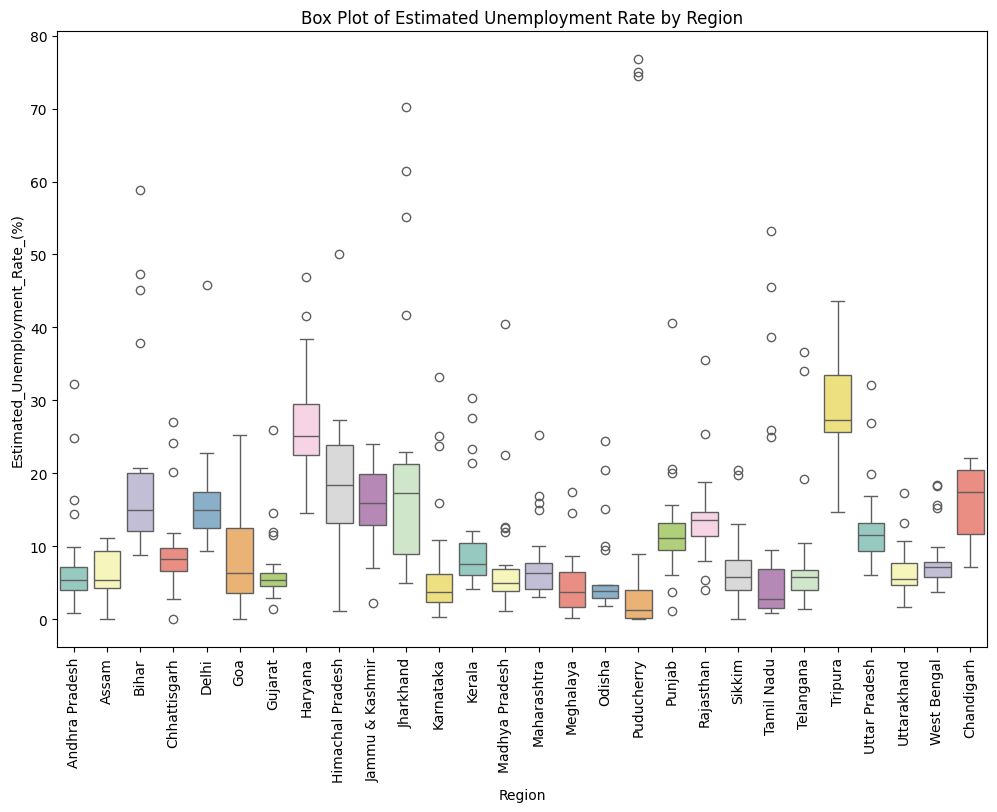

In [24]:
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette="Set3")
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.gcf().set_size_inches(12, 8)
plt.xticks(rotation=90)
plt.show()

In [25]:
data1 = df[['Region','Estimated_Unemployment_Rate_(%)']].groupby('Region').sum().sort_values(by='Estimated_Unemployment_Rate_(%)',ascending=False)
data1.head(15)

,Estimated_Unemployment_Rate_(%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [26]:
plot = px.bar(data1, x=data1.index, y="Estimated_Unemployment_Rate_(%)", title = 'Top 15 States with Highest Unemployment Rate',color=data1.index) 
plot.show()

In [27]:
data2 = df[['Area', 'Estimated_Unemployment_Rate_(%)']].groupby('Area').sum().sort_values(by='Estimated_Unemployment_Rate_(%)', ascending=False)
plot_area = px.bar(data2, x=data2.index, y="Estimated_Unemployment_Rate_(%)", title='Unemployment Rate by Area', color=data2.index)
plot_area.show()

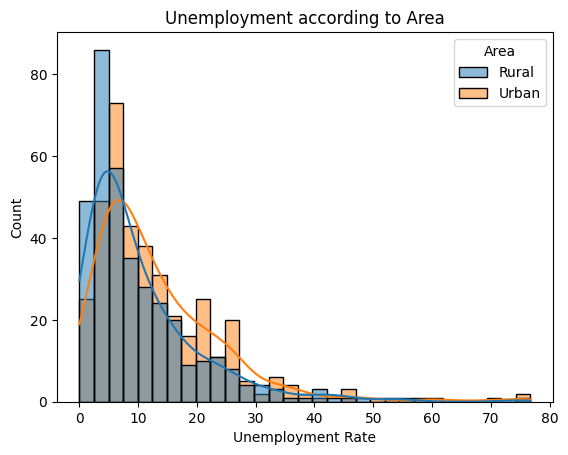

In [28]:
#fig = plt.figure(figsize = (10, 10))
sns.histplot(x='Estimated_Unemployment_Rate_(%)', data=df, kde=True, hue='Area')
plt.title('Unemployment according to Area')
plt.xlabel('Unemployment Rate')
plt.show()

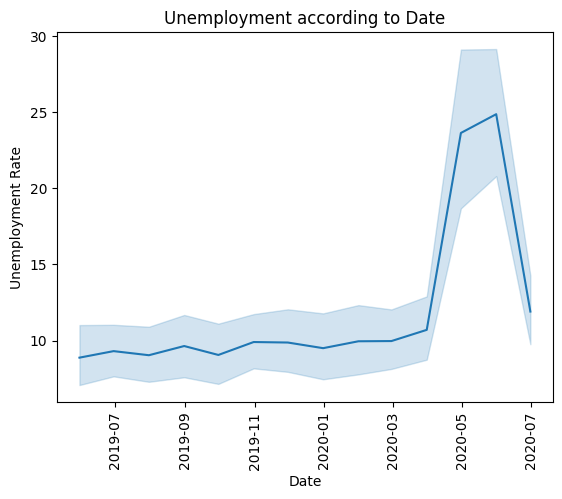

In [29]:
#fig = plt.figure(figsize = (5, 5))
sns.lineplot(y='Estimated_Unemployment_Rate_(%)', x='Date', data=df)
plt.title('Unemployment according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Unemployment Rate')
plt.show()

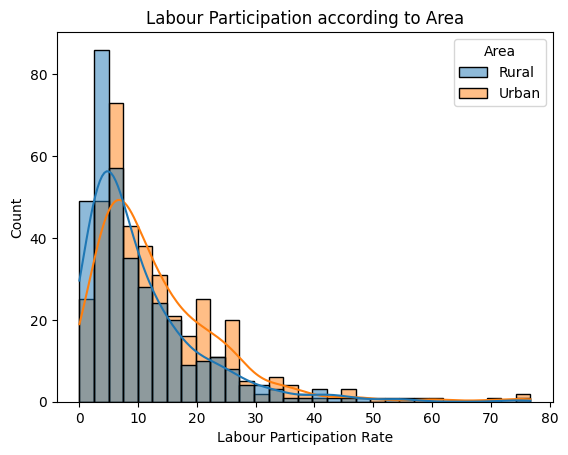

In [30]:
#fig = plt.figure(figsize = (30, 15))
sns.histplot(x='Estimated_Unemployment_Rate_(%)', data=df, kde=True, hue='Area')
plt.title('Labour Participation according to Area')
plt.xlabel('Labour Participation Rate')
plt.show()